# Laboratorium 2

**Zadanie L2.1.** Znajdź najmniejszą liczbę postaci $\epsilon_k := 2^{−k}, k \in N$, taką że $f loat(\epsilon_k) > 0$.

In [15]:
fl = 1
k = 0
min = []
while fl>0:
    fl = float(2**(-k))
    min.append(fl)
    k=k+1

print(min[-2])

5e-324


**Zadanie L2.2.** Znajdź największą liczbę postaci $\alpha_k := 2^k, k \in N$ mieszczącą się w zmiennych typu float języka Python.

In [22]:
k = 0
x = 0
max = []

while True:
    try:
        x = float(2**k)
        max.append(x)
        k=k+1
    except OverflowError:
        print(max[-1])
        break

8.98846567431158e+307


**Zadanie L2.3.** Znajdź najmniejsze liczby postaci $\epsilon_k := 2^{−k}, k \in N$, takie że:

a) $f l(1 + \epsilon_k)  = f l(1)$,
b) $f l(10^{−10} + \epsilon_k)  = f l(10^{−10})$

In [10]:
# a
k = 0
x = 2
eps = 0
min_a= []
result = float(1)

while x != result:
    eps = float(2**(-k))
    x = float(1+eps)
    min_a.append(eps)
    k=k+1

print("A:", min_a[-1])

# b
min_b = []
k = 0
x = 2
eps = 0
result = float(10**(-10))

while x != result:
    eps = float(2**(-k))
    x = float(10**(-10)+eps)
    k=k+1
    min_b.append(eps)

print("B:", min_b[-1])

A: 1.1102230246251565e-16
B: 3.2311742677852644e-27


**Zadanie L2.4.** Sprawdź które z podanych ułamków są reprezentowane dokładnie w zmiennych typu float języka Python: $\frac{1}{2}, \frac{1}{3}, \frac{1}{5}, \frac{1}{8}, \frac{1}{10}, \frac{1}{16}, \frac{1}{100}$.

In [6]:
from sympy import Rational

fractions = [Rational(1,2), Rational(1,3), Rational(1,5), Rational(1,8), Rational(1,10), Rational(1,16), Rational(1,100)]

for frac in fractions:
    if frac == float(frac):
        print(f"{frac} jest reprezentowane dokładnie w typie float")
    else:
        print(f"{frac} nie jest reprezentowane dokładnie w typie float")


1/2 jest reprezentowane dokładnie w typie float
1/3 nie jest reprezentowane dokładnie w typie float
1/5 nie jest reprezentowane dokładnie w typie float
1/8 jest reprezentowane dokładnie w typie float
1/10 nie jest reprezentowane dokładnie w typie float
1/16 jest reprezentowane dokładnie w typie float
1/100 nie jest reprezentowane dokładnie w typie float


**Zadanie L2.5.** Ile cyfr po przecinku jest reprezentowanych poprawnie (mniej więcej) w zmiennych typu float języka Python?

In [2]:
def count_float_precision():
    initial_value = 1.0
    precision = 0

    while True:
        new_value = initial_value + pow(10, -precision)
        if new_value == initial_value:
            break
        precision += 1

    return precision

count_float_precision()

16

**Zadanie L2.6.** Zaproponuj sekwencję operacji arytmetycznych, które doprowadzą do umieszczenia w zmiennej wartości zmiennoprzecinkowej typu NaN.

In [8]:
x = float('inf')
y = float('inf')
z = float(0)
z = x-y*z
print(z)

nan


**Zadanie L2.7.** Zaimplementuj funkcję $mycos$, która oblicza $cos(x)$ dla zadanej wartości $x$, korzystając z przybliżenia

$cos(x) \approx \sum_{k=0}^n \frac{(-1)^k x^{2k}}{2k!}$

Sporządź wykres dla $x \in [−5\pi, 5\pi]$ i $n = 5$. Określ jakie $n$ należy wybrać, aby błąd aproksymacji był mniejszy niż 0.1.

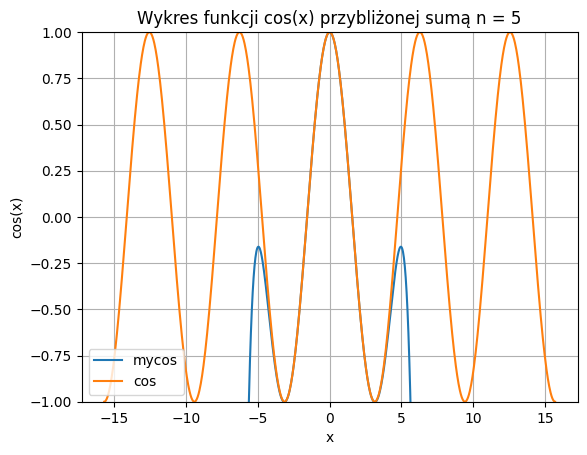

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

def mycos(x, n):
    sum = 0.0
    for k in range(n+1):
        licznik = (-1)**k * x**(2*k)
        mianownik = math.factorial(2*k)
        sum += licznik / mianownik
    return sum

n = 5
x_values = np.linspace(-5*math.pi, 5*math.pi, 1000)
y_values = [mycos(x, n) for x in x_values]

plt.ylim([-1,1])
plt.plot(x_values, y_values, label='mycos')
plt.plot(x_values, np.cos(x_values), label='cos')
plt.title('Wykres funkcji cos(x) przybliżonej sumą n = 5')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.grid()
plt.show()

In [35]:
n = 1
mean_diff = 10.0

while True:
    y_values_mycos = [mycos(x, n) for x in x_values]
    y_values_cos = np.cos(x_values)
    diffs = [abs(y_values_mycos[i] - y_values_cos[i]) for i in range(len(x_values))]
    mean_diff = np.mean(diffs)
    print(f"n: {n}; error: {mean_diff}")
    if mean_diff < 0.1:
        print('Najmniejsze n: ', n)
        break

    n += 1


n: 1; error: 40.204680703580436
n: 2; error: 469.1670768061179
n: 3; error: 2529.2549272873453
n: 4; error: 7766.705531680526
n: 5; error: 15374.192461255117
n: 6; error: 21300.042039217034
n: 7; error: 21876.378174297264
n: 8; error: 17368.412568989785
n: 9; error: 11001.606163427297
n: 10; error: 5698.278202881905
n: 11; error: 2461.2584944166542
n: 12; error: 900.8848332678626
n: 13; error: 283.1936956964807
n: 14; error: 77.32292589184284
n: 15; error: 18.516141925044074
n: 16; error: 3.9215572204224736
n: 17; error: 0.739993757891053
n: 18; error: 0.12522258287135712
n: 19; error: 0.01911333900717047
Najmniejsze n:  19


**Zadanie L2.8.** Zaimplementuj funkcję, która oblicza $e^x$ dla zadanych wartości $x$ oraz $n$, korzystając z przybliżenia

$e^x \approx \sum_{k=0}^{n} \frac{x^k}{k!}$

Biorąc pod uwagę przedział $[−100, 100]$ określ, czy funkcja równie dobrze działa dla dodatnich,jak i ujemnych liczb rzeczywistych. Napisz program demonstrujący zaobserowaną zależność.

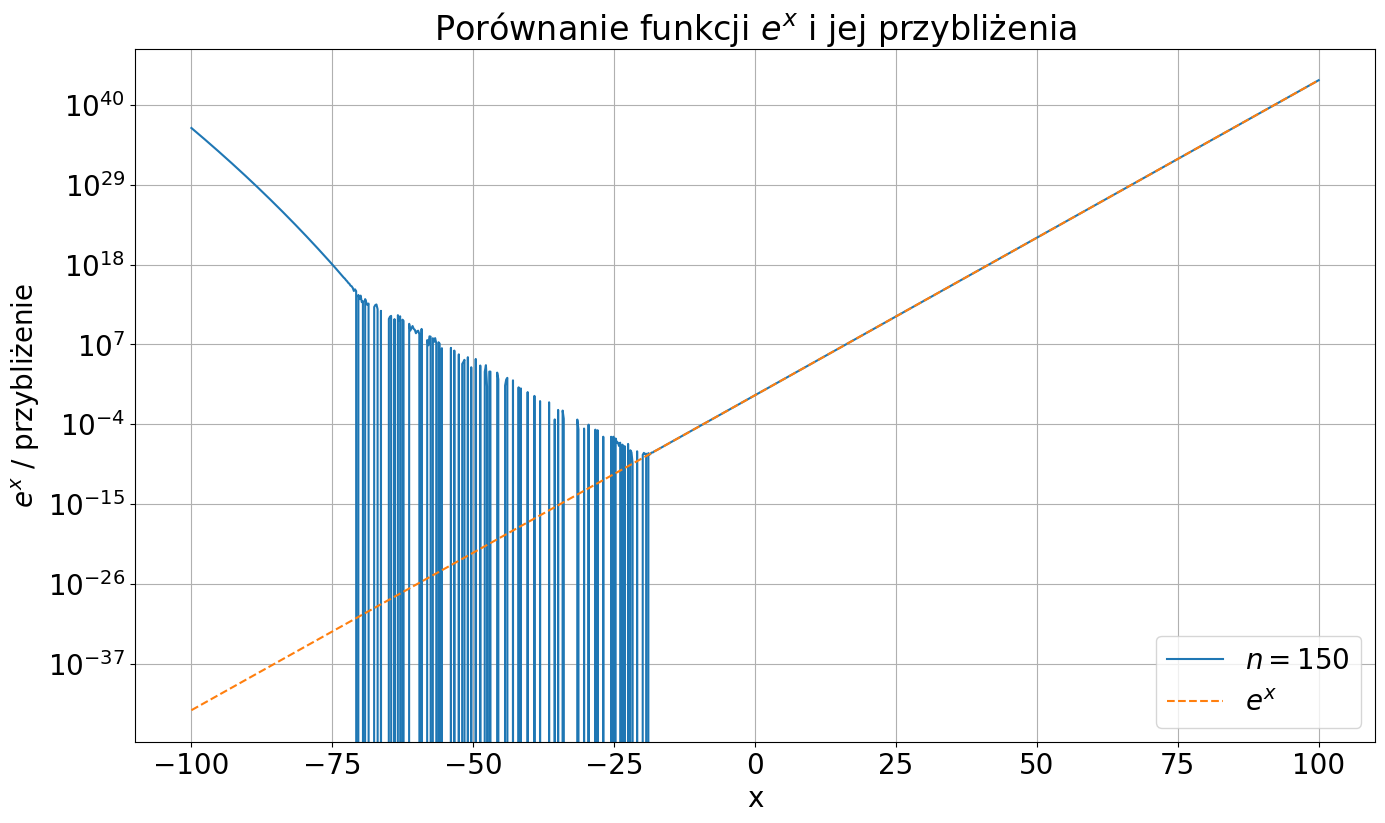

In [48]:
def myexp(x, n):
    sum = 0.0
    for k in range(n+1):
        licznik = x**k
        mianownik = math.factorial(k)
        sum += licznik / mianownik
    return sum

x_values = np.linspace(-100, 100, 1000)
y_values = np.exp(x_values)

n=150

approx_values = [myexp(x, n) for x in x_values]
plt.plot(x_values, approx_values, label=f'$n = {n}$')

plt.plot(x_values, y_values, linestyle='dashed', label='$e^x$')
plt.legend()
plt.yscale('log')
plt.title('Porównanie funkcji $e^x$ i jej przybliżenia')
plt.xlabel('x')
plt.ylabel('$e^x$ / przybliżenie')
plt.grid()
plt.show();